**Objective**: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

# Task 1: Data Loading and Exploration
1. Load the Heart Disease UCI dataset.
2. Explore the dataset to understand its structure and features.
3. Split the data into training and testing sets.

In [1]:
# insert code here
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [2]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [11]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


# Task 2: Data Preprocessing
1. Handle missing values if any.
2. Encode categorical variables using appropriate methods.
3. Standardize or normalize numerical features if necessary.

In [6]:
# insert code here

#Checking missing data and process with it
nan_count_by_column = X.isna().sum()
print("Before")
print(nan_count_by_column)

mode = X['thal'].mode()[0]
X.loc[X['thal'].isnull(),'thal']= mode

mode = X['ca'].mode()[0]
X.loc[X['ca'].isnull(),'ca']= mode

nan_count_by_column = X.isna().sum()
print("After")
print(nan_count_by_column)



Before
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64
After
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [4]:
# One-hot encode categorical features with column alignment
X = pd.get_dummies(X)

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 3: Initial XGBoost Model
1. Build an initial XGBoost model using default hyperparameters.
2. Train the model on the training set and evaluate its performance on the testing set.
3. Note down the accuracy and any other relevant metrics.

In [31]:
# Import XGBClassifier from xgboost
from xgboost import XGBClassifier

# Import accuracy_score for evaluation
from sklearn.metrics import accuracy_score

# Create an XGBoost model
xgb_model_init = XGBClassifier(random_state=42)

# Train the model
xgb_model_init.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions_init = xgb_model_init.predict(X_test)

# Evaluate the accuracy of the model
xgb_accuracy_init = accuracy_score(y_test, xgb_predictions_init)
print(f'Test accuracy {xgb_accuracy_init}')

Test accuracy 0.4918032786885246


# Task 4: Hyperparameter Tuning
1. Experiment with hyperparameter tuning to improve model performance.
2. Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
3. Use techniques like cross-validation to find optimal hyperparameters.
4. Train and evaluate the model with the tuned hyperparameters.

In [27]:
# insert code here

from sklearn.model_selection import GridSearchCV
#CV = Cross validation, it will split into different folds and it guarantees that you don't have the same training and test set at each iterations

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5]
}

# Create a XGBClassifier instance
xgb_model = XGBClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_xgb_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best Model Accuracy: 0.5245901639344263


In [32]:
#Checking if it's the same

# Create an XGBoost model
xgb_model_tuned = XGBClassifier(learning_rate=0.1, max_depth = 4, n_estimators = 100,random_state=42)

# Train the model
xgb_model_tuned.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions_tuned = xgb_model_tuned.predict(X_test)

# Evaluate the accuracy of the model
xgb_accuracy_tuned = accuracy_score(y_test, xgb_predictions_tuned)
print(f'Test accuracy {xgb_accuracy_tuned}')

Test accuracy 0.5245901639344263


# Task 5: Feature Importance
1. Explore feature importance using the **feature_importances_** attribute of the trained XGBoost model.
2. Identify the most important features for heart disease prediction.

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

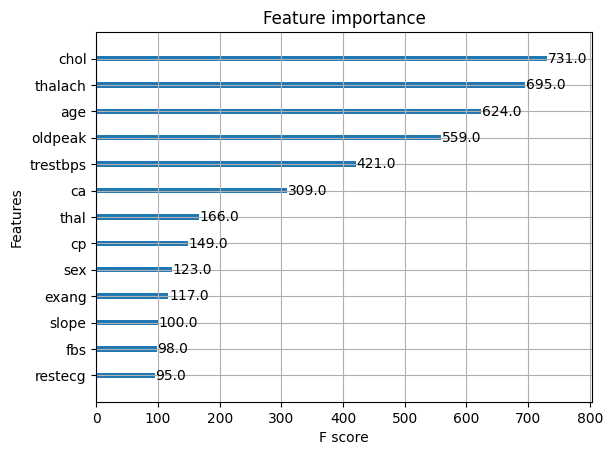

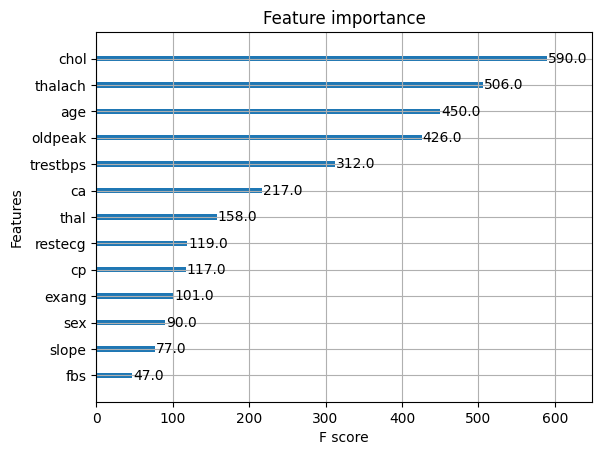

In [62]:
# insert code here

#Plot from XBG library (Fscore)
xgb.plot_importance(xgb_model_tuned)
xgb.plot_importance(xgb_model_init)

     Feature  Importance
2         cp    0.150990
11        ca    0.131514
12      thal    0.114290
8      exang    0.083058
10     slope    0.079443
9    oldpeak    0.074941
1        sex    0.074403
5        fbs    0.056626
7    thalach    0.056590
0        age    0.051015
4       chol    0.048792
3   trestbps    0.040832
6    restecg    0.037506


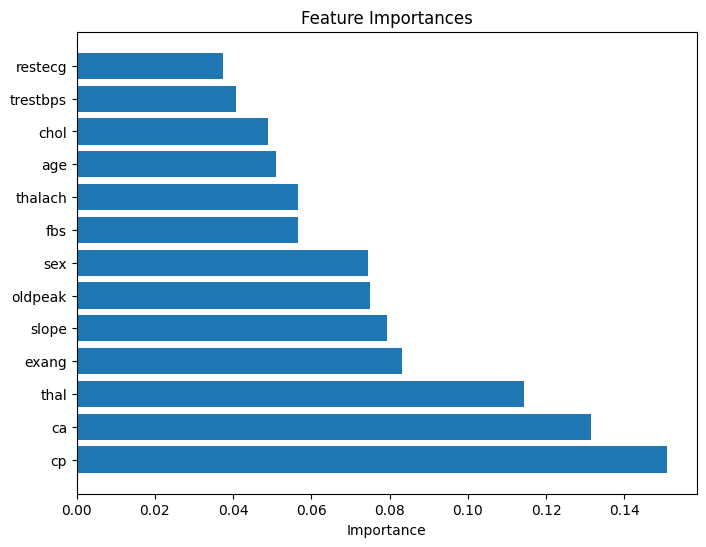

In [30]:
#Use Matplotlib and Importance

import matplotlib.pyplot as plt

# Get Importances from features
feature_importances = xgb_model_tuned.feature_importances_

# X axis
feature_names = X.columns 

# Create a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by value (descending)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot graph
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# Task 6: Model Evaluation
1. Compare the performance metrics of the initial model and the tuned model.
2. Visualize the improvement achieved in a clear and concise manner.
3. Discuss the impact of hyperparameter tuning and feature importance on model performance.

In [47]:
# insert code here

from sklearn.metrics import precision_score,recall_score,f1_score

# Init Metrics
accuracy_init = accuracy_score(y_test, xgb_predictions_init)
precision_init = precision_score(y_test, xgb_predictions_init,average='weighted')
recall_init = recall_score(y_test, xgb_predictions_init,average='weighted')
f1_score_init = f1_score(y_test, xgb_predictions_init,average='weighted')


# Tuned Metrics
accuracy_tuned = accuracy_score(y_test, xgb_predictions_tuned)
precision_tuned = precision_score(y_test, xgb_predictions_tuned,average='weighted')
recall_tuned = recall_score(y_test, xgb_predictions_tuned,average='weighted')
f1_score_tuned = f1_score(y_test, xgb_predictions_tuned,average='weighted')

# Print both metrics
print(f"Accuracy_init: {accuracy_init} \t ----- \t \t Accuracy_tuned : {accuracy_tuned}")
print(f"Precision_init: {precision_init} \t ----- \t \t Precision_tuned : {precision_tuned}")
print(f"Recall_init: {recall_init} \t ----- \t \t Recall_tuned : {recall_tuned}")
print(f"F1_Score_init: {f1_score_init} \t ----- \t \t F1_Score_tuned : {f1_score_tuned}")


Accuracy_init: 0.4918032786885246 	 ----- 	 	 Accuracy_tuned : 0.5245901639344263
Precision_init: 0.431197218082464 	 ----- 	 	 Precision_tuned : 0.45446029380455616
Recall_init: 0.4918032786885246 	 ----- 	 	 Recall_tuned : 0.5245901639344263
F1_Score_init: 0.4593865679534638 	 ----- 	 	 F1_Score_tuned : 0.4841296376186368


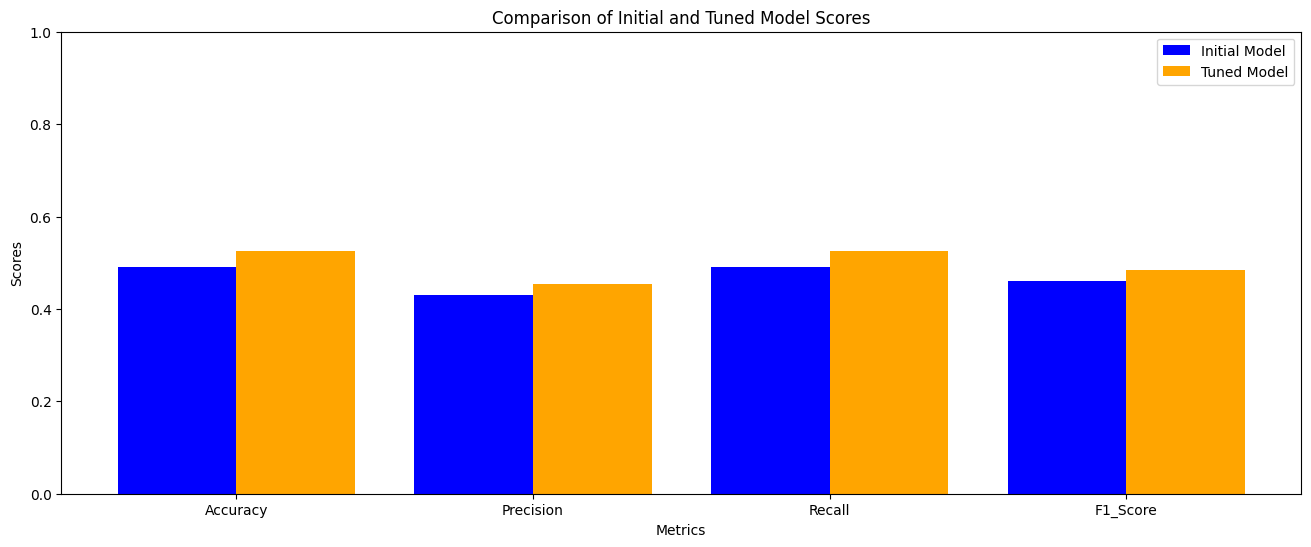

In [61]:
import numpy as np

initial_scores = [accuracy_init, precision_init, recall_init, f1_score_init]
tuned_scores = [accuracy_tuned, precision_tuned, recall_tuned, f1_score_tuned]

score_names = ['Accuracy', 'Precision', 'Recall', 'F1_Score']

# Create a bar chart for the initial and tuned models
bar_width = 0.4
index = np.arange(len(score_names))

plt.figure(figsize=(16, 6))
plt.bar(index, initial_scores, width=bar_width, label='Initial Model', color='blue')
plt.bar(index + bar_width, tuned_scores, width=bar_width, label='Tuned Model', color='orange')
plt.ylim(0.0, 1.0)  # Set the y-axis limits between 0 and 1
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Initial and Tuned Model Scores')
plt.xticks(index + bar_width / 2, score_names)
plt.legend()

plt.show()


Hyperparameters tuning can improve the model's performance. This allows to have better metrics as we can see in the graph. By doing Hyperparameter optimization, we change some variables that would impact the model and that could change the features importance according to the model, that's why we still have the same main features but the features that are not that relevant are not in the same rank in the tuned and initial model. Those 2 notions are related in a way.